# Codenames Simulator

Inspired by Zhiheng Jiang's article: https://towardsdatascience.com/hacking-codenames-with-glove-embeddings-0cf928af0858


In [164]:
!pip install gensim
from gensim.models import KeyedVectors
import gensim.downloader as api

# Download the GloVe model
glove_file = api.load('glove-wiki-gigaword-100', return_path=True)  # Download and get file path

# Load the GloVe model
glove = KeyedVectors.load_word2vec_format(glove_file, binary=False)

# Define your good and bad words (replace ... with actual words)
good_words = ["love", "happy", "friend"]
bad_words = ["hate", "sad", "enemy"]

# Find most similar words
candidates = glove.most_similar(positive=good_words, negative=bad_words, topn=20)
print(candidates)

[==================================================] 100.0% 128.1/128.1MB downloaded
[('daughter', 0.565400242805481), ('grandmother', 0.5507089495658875), ('married', 0.5481899380683899), ('lucy', 0.5469032526016235), ('wife', 0.5422877669334412), ('father', 0.538153350353241), ('susan', 0.5373176336288452), ('fiancee', 0.5339735150337219), ('husband', 0.5291475653648376), ('son', 0.5288969874382019), ('mother', 0.5248327851295471), ('alice', 0.5235893726348877), ('girlfriend', 0.522793710231781), ('uncle', 0.5198529958724976), ('boyfriend', 0.519123911857605), ('sarah', 0.5179063081741333), ('brother', 0.5127915740013123), ('evans', 0.5116064548492432), ('grandfather', 0.511601984500885), ('granddaughter', 0.5113800764083862)]


In [213]:
good_words = [
    "Africa",
    "Berlin",
    "Water",
    "Nurse",
    "Saturn",
    "Net",
    "Mug",
    "Rose",
    "Mole",
]

bad_words = [
    "Bridge",
    "Head",
    "Turkey",
    "Pie",
    "Ring",
    "Press",
    "Snowman",
    "Wind",
    "Sink",
]

neutral_words = [
    "Bank",
    "Light",
    "Olympus",
    "Rome",
    "Torch",
    "Park"
]
really_bad_word = "Pirate"

all_words = good_words + bad_words + neutral_words + [really_bad_word]

In [190]:
from tabulate import tabulate

candidates = glove.most_similar(
    positive=[w.lower() for w in good_words],
    negative=[w.lower() for w in bad_words + [really_bad_word]],
    topn=20,
)

print(tabulate(candidates, headers=["Word", "Score"]))

print(glove.most_similar(positive=['water', 'wind'], topn=5))

Word             Score
------------  --------
578           0.443498
563           0.426494
48.5          0.425412
antenatal     0.425223
genentech     0.422988
langat        0.418149
hiv-positive  0.418019
buemi         0.417908
393           0.415987
rochon        0.415952
imasco        0.41594
16.55         0.411025
clarins       0.408888
50.4          0.40866
aveda         0.407756
561           0.40752
finerman      0.405961
439           0.404666
47.3          0.403692
docetaxel     0.40152
[('rain', 0.7496216297149658), ('heat', 0.6985301375389099), ('light', 0.692646861076355), ('waves', 0.6874662637710571), ('ocean', 0.6838535070419312)]


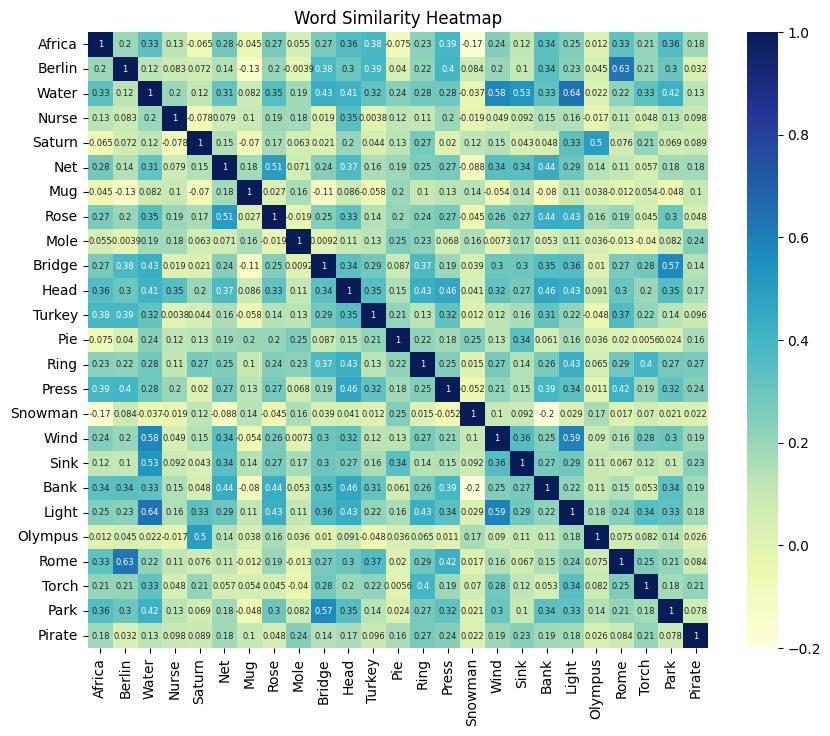

In [186]:
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.metrics.pairwise import cosine_similarity
import numpy as np

# Get word embeddings for the words in the set
word_embeddings = np.array([glove[word.lower()] for word in all_words])

# Calculate cosine similarity matrix
similarity_matrix = cosine_similarity(word_embeddings)

# Create a heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(
    similarity_matrix,
    annot=True,
    xticklabels=all_words,
    yticklabels=all_words,
    cmap="YlGnBu",
    annot_kws={"size": 6},
)
plt.title("Word Similarity Heatmap")
plt.show()

In [11]:
glove.most_similar(positive=['africa', 'berlin', 'saturn'], topn=5)


[('europe', 0.7681346535682678),
 ('world', 0.6972420811653137),
 ('germany', 0.6864026188850403),
 ('next', 0.6584822535514832),
 ('part', 0.6529160737991333)]

In [1]:
import nltk
from nltk.corpus import wordnet

nltk.download('wordnet')

[nltk_data] Downloading package wordnet to /root/nltk_data...


True

In [3]:
word1 = wordnet.synsets('cat')[0]
word2 = wordnet.synsets('dog')[0]

similarity = word1.path_similarity(word2)
print(similarity)
similarity = word1.wup_similarity(word2)
print(similarity)


0.2
0.8571428571428571


In [191]:
j = 0
for i,w in enumerate(all_words):
  print(f'{i+1}. {w.upper()}')
  for s in wordnet.synsets(w):
    j += 1
    print(f"    {j}. {s.name()}: {s.definition()}")
  print()

print(len(all_words))
# for synset in [s for w in all_words for s in wordnet.synsets(w)]:
#     print(f"{synset.name()}: {synset.definition()}")

# q = ['cat','dog']
# for c in [c for w in q for c in w.upper()]:
#   print(c)

1. AFRICA
    1. africa.n.01: the second largest continent; located to the south of Europe and bordered to the west by the South Atlantic and to the east by the Indian Ocean

2. BERLIN
    2. berlin.n.01: capital of Germany located in eastern Germany
    3. berlin.n.02: United States songwriter (born in Russia) who wrote more than 1500 songs and several musical comedies (1888-1989)
    4. berlin.n.03: a limousine with a glass partition between the front and back seats

3. WATER
    5. water.n.01: binary compound that occurs at room temperature as a clear colorless odorless tasteless liquid; freezes into ice below 0 degrees centigrade and boils above 100 degrees centigrade; widely used as a solvent
    6. body_of_water.n.01: the part of the earth's surface covered with water (such as a river or lake or ocean)
    7. water.n.03: once thought to be one of four elements composing the universe (Empedocles)
    8. water_system.n.02: a facility that provides a source of water
    9. urine.n.0

In [5]:
attributes_and_methods = [attr for attr in dir(word1) if not attr.startswith('__')]

for attribute in attributes_and_methods:
    if callable(getattr(word1, attribute)):
        if attribute in ["upper", "lower"]:  # Call only 'upper' and 'lower' methods
            result = getattr(word1, attribute)()
            print(f"Result of calling {attribute}(): {result}")

['__class__', '__delattr__', '__dict__', '__dir__', '__doc__', '__eq__', '__format__', '__ge__', '__getattribute__', '__gt__', '__hash__', '__init__', '__init_subclass__', '__le__', '__lt__', '__module__', '__ne__', '__new__', '__reduce__', '__reduce_ex__', '__repr__', '__setattr__', '__sizeof__', '__slots__', '__str__', '__subclasshook__', '__weakref__', '_all_hypernyms', '_definition', '_doc', '_examples', '_frame_ids', '_hypernyms', '_instance_hypernyms', '_iter_hypernym_lists', '_lemma_names', '_lemma_pointers', '_lemmas', '_lexname', '_max_depth', '_min_depth', '_name', '_needs_root', '_offset', '_pointers', '_pos', '_related', '_shortest_hypernym_paths', '_wordnet_corpus_reader', 'acyclic_tree', 'also_sees', 'attributes', 'causes', 'closure', 'common_hypernyms', 'definition', 'entailments', 'examples', 'frame_ids', 'hypernym_distances', 'hypernym_paths', 'hypernyms', 'hyponyms', 'in_region_domains', 'in_topic_domains', 'in_usage_domains', 'instance_hypernyms', 'instance_hyponyms'

In [22]:
word2.shortest_path_distance(word1)

4

In [25]:
word1._shortest_hypernym_paths(simulate_root=False)

{Synset('cat.n.01'): 0,
 Synset('feline.n.01'): 1,
 Synset('carnivore.n.01'): 2,
 Synset('placental.n.01'): 3,
 Synset('mammal.n.01'): 4,
 Synset('vertebrate.n.01'): 5,
 Synset('chordate.n.01'): 6,
 Synset('animal.n.01'): 7,
 Synset('organism.n.01'): 8,
 Synset('living_thing.n.01'): 9,
 Synset('whole.n.02'): 10,
 Synset('object.n.01'): 11,
 Synset('physical_entity.n.01'): 12,
 Synset('entity.n.01'): 13}

In [41]:
!pip install pyvis

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 756.0/756.0 kB 6.8 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.6/1.6 MB 13.9 MB/s eta 0:00:00


In [194]:
all_words

['Africa',
 'Berlin',
 'Water',
 'Nurse',
 'Saturn',
 'Net',
 'Mug',
 'Rose',
 'Mole',
 'Bridge',
 'Head',
 'Turkey',
 'Pie',
 'Ring',
 'Press',
 'Snowman',
 'Wind',
 'Sink',
 'Bank',
 'Light',
 'Olympus',
 'Rome',
 'Torch',
 'Park',
 'Pirate']

In [209]:
import networkx as nx
from nltk.corpus import wordnet as wn

# Create a directed graph
G = nx.DiGraph()

# Add nodes and edges for a synset and its hypernyms
def add_hypernyms(synset, G):
    G.add_node(synset.name())
    for hypernym in synset.hypernyms():
        G.add_edge(synset.name(), hypernym.name(), relation="hyponym")  # Edge from synset to hypernym
        # G.add_edge(hypernym.name(), synset.name(), relation="hypernym")  # Edge from hypernym to synset
        add_hypernyms(hypernym, G)

for synset in [s for w in all_words for s in wn.synsets(w)]:
  add_hypernyms(synset, G)


In [210]:
from pyvis.network import Network

net = Network(notebook=True, cdn_resources='in_line', directed=True)  # Create a pyvis network object
net.from_nx(G)  # Add nodes and edges from your networkx graph

# Customize layout options
net.show_buttons(filter_=['physics'])  # Show physics options in the interactive visualization

net.show("mygraph.html")  # Display the interactive graph

mygraph.html


In [146]:
import heapq
import re

def shortest_path_with_directions(graph, source, target, limit=1000):
    '''
    Finds the shortest path between two nodes in a directed graph.
    Uses a modified Dijkstra's algorithm to handle bidirectional edges.
    Returns the distance, path, and edge directions.
    '''
    queue = [(0, source, [])]  # (distance, node, path)
    visited = set()

    while queue:
        (dist, node, path) = heapq.heappop(queue)
        if node in visited:
            continue
        visited.add(node)
        path = path + [node]
        if dist > limit:
            break

        if node == target:
            return dist, path, get_edge_directions(graph, path)

        for neighbor in list(graph.successors(node)) + list(graph.predecessors(node)):
            if neighbor not in visited:
                heapq.heappush(queue, (dist + 1, neighbor, path))

    return None, None, None  # Return None if no path is found

def get_edge_directions(graph, path):
    directions = []
    relations = []
    for i in range(len(path) - 1):
        try:
          relations.append(graph[path[i]][path[i+1]]['relation'])
        except:
          opp_relation = graph[path[i+1]][path[i]]['relation']
          if opp_relation == 'hyponym':
            relations.append('hypernym')
          elif opp_relation == 'hypernym':
            relations.append('hyponym')
    return relations

# start_node = dog_senses[0].name()
# end_node = cat_senses[0].name()
print(start_node, end_node)
distance, path, relations = shortest_path_with_directions(G, start_node, end_node, limit=1000)
print("Distance:", distance)
print("Path:", path)
print("Relations:", relations)

simple_names = [n.split('.')[0] for n in path]
print(' '.join([f"{n}, {r} of" for n,r in zip(simple_names, relations)]) + f' {simple_names[-1]}')

frump.n.01 guy.n.01
Distance: 7
Path: ['frump.n.01', 'unpleasant_woman.n.01', 'unpleasant_person.n.01', 'unwelcome_person.n.01', 'person.n.01', 'adult.n.01', 'man.n.01', 'guy.n.01']
Relations: ['hyponym', 'hyponym', 'hyponym', 'hyponym', 'hypernym', 'hypernym', 'hypernym']
frump, hyponym of unpleasant_woman, hyponym of unpleasant_person, hyponym of unwelcome_person, hyponym of person, hypernym of adult, hypernym of man, hypernym of guy


In [208]:
distances = np.zeros((len(good_words), len(good_words)))
distances[0,1] = 5
distances
wn.synsets('Africa')[0].hypernyms()

[]

Africa Berlin
Distance: 1000
Path: None
Relations: None

Africa Water
Distance: 1000
Path: None
Relations: None

Africa Nurse
Distance: 1000
Path: None
Relations: None

Africa Saturn
Distance: 1000
Path: None
Relations: None

Africa Net
Distance: 1000
Path: None
Relations: None

Africa Mug
Distance: 1000
Path: None
Relations: None

Africa Rose
Distance: 1000
Path: None
Relations: None

Africa Mole
Distance: 1000
Path: None
Relations: None

Africa Bridge
Distance: 1000
Path: None
Relations: None

Africa Head
Distance: 1000
Path: None
Relations: None

Africa Turkey
Distance: 1000
Path: None
Relations: None

Africa Pie
Distance: 1000
Path: None
Relations: None

Africa Ring
Distance: 1000
Path: None
Relations: None

Africa Press
Distance: 1000
Path: None
Relations: None

Africa Snowman
Distance: 1000
Path: None
Relations: None

Africa Wind
Distance: 1000
Path: None
Relations: None

Africa Sink
Distance: 1000
Path: None
Relations: None

Africa Bank
Distance: 1000
Path: None
Relations: None


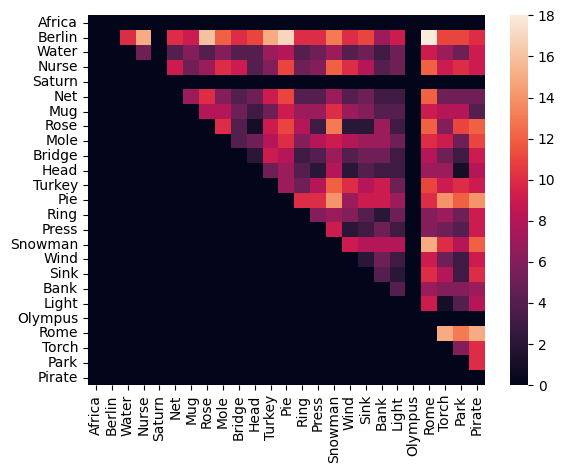

In [222]:
# find shortest path between all possible senses of two words
word_set = all_words

distances = np.zeros((len(word_set), len(word_set)))
for x,word_a in enumerate(word_set):
  for y,word_b in enumerate(word_set[x+1:]):
    shortest_distance = 1000
    shortest_path = None
    shortest_relations = None
    for i in wn.synsets(word_a):
      for j in wn.synsets(word_b):
        distance, path, relations = shortest_path_with_directions(G, i.name(), j.name(), limit=shortest_distance)
        if distance and distance < shortest_distance:
          shortest_distance = distance
          shortest_path = path
          shortest_relations = relations
          distances[x,x+y+1] = shortest_distance

    print(word_a, word_b)
    print("Distance:", shortest_distance)
    print("Path:", shortest_path)
    print("Relations:", shortest_relations)
    if shortest_path:
      simple_names = [n.split('.')[0] for n in shortest_path]
      print(' '.join([f"{n.upper()} is {r} of" for n,r in zip(simple_names, shortest_relations)]) + f' {simple_names[-1].upper()}')
    print()

sns.heatmap(distances, xticklabels=word_set, yticklabels=word_set)
plt.show()

In [75]:
x = shortest_path_with_directions(G, start_node, end_node)
print(x)

None


In [80]:
print(dog_senses[0]._shortest_hypernym_paths(simulate_root=False))
print(dog_senses[1]._shortest_hypernym_paths(simulate_root=False))

{Synset('dog.n.01'): 0, Synset('canine.n.02'): 1, Synset('domestic_animal.n.01'): 1, Synset('carnivore.n.01'): 2, Synset('animal.n.01'): 2, Synset('placental.n.01'): 3, Synset('organism.n.01'): 3, Synset('mammal.n.01'): 4, Synset('living_thing.n.01'): 4, Synset('vertebrate.n.01'): 5, Synset('whole.n.02'): 5, Synset('chordate.n.01'): 6, Synset('object.n.01'): 6, Synset('physical_entity.n.01'): 7, Synset('entity.n.01'): 8}
{Synset('frump.n.01'): 0, Synset('unpleasant_woman.n.01'): 1, Synset('unpleasant_person.n.01'): 2, Synset('unwelcome_person.n.01'): 3, Synset('person.n.01'): 4, Synset('causal_agent.n.01'): 5, Synset('organism.n.01'): 5, Synset('physical_entity.n.01'): 6, Synset('living_thing.n.01'): 6, Synset('entity.n.01'): 7, Synset('whole.n.02'): 7, Synset('object.n.01'): 8}


In [81]:
dog_senses[0].hypernyms()

[Synset('canine.n.02'), Synset('domestic_animal.n.01')]

In [87]:
print(G.nodes())

['dog.n.01', 'canine.n.02', 'carnivore.n.01', 'placental.n.01', 'mammal.n.01', 'vertebrate.n.01', 'chordate.n.01', 'animal.n.01', 'organism.n.01', 'living_thing.n.01', 'whole.n.02', 'object.n.01', 'physical_entity.n.01', 'entity.n.01', 'domestic_animal.n.01', 'frump.n.01', 'unpleasant_woman.n.01', 'unpleasant_person.n.01', 'unwelcome_person.n.01', 'person.n.01', 'causal_agent.n.01', 'dog.n.03', 'chap.n.01', 'male.n.02', 'cad.n.01', 'villain.n.01', 'frank.n.02', 'sausage.n.01', 'meat.n.01', 'food.n.02', 'solid.n.01', 'matter.n.03', 'pawl.n.01', 'catch.n.06', 'restraint.n.06', 'device.n.01', 'instrumentality.n.03', 'artifact.n.01', 'andiron.n.01', 'support.n.10', 'chase.v.01', 'pursue.v.02', 'travel.v.01']
